In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set()


In [2]:
laptop_data = pd.read_csv('./laptop_price.csv', encoding='latin-1')
laptop_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
print("Data type : ", type(laptop_data))
print("Data dims : ", laptop_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1303, 13)


In [15]:
#Removing the laptop ID column
laptop_data_clean = laptop_data.copy()
laptop_data_clean.pop('laptop_ID')

0          1
1          2
2          3
3          4
4          5
        ... 
1298    1316
1299    1317
1300    1318
1301    1319
1302    1320
Name: laptop_ID, Length: 1303, dtype: int64

In [16]:
#Combining the string together for preparation to take only the resolution
laptop_data_clean["ScreenResolution"] = laptop_data_clean["ScreenResolution"].str.replace(" ", "")
laptop_data_clean["ScreenResolution"]

0             IPSPanelRetinaDisplay2560x1600
1                                   1440x900
2                            FullHD1920x1080
3             IPSPanelRetinaDisplay2880x1800
4             IPSPanelRetinaDisplay2560x1600
                        ...                 
1298     IPSPanelFullHD/Touchscreen1920x1080
1299    IPSPanelQuadHD+/Touchscreen3200x1800
1300                                1366x768
1301                                1366x768
1302                                1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [17]:
#Combining the string together for preparation to take only the resolution
laptop_data_clean["ScreenResolution"] = laptop_data_clean["ScreenResolution"].str.replace(" ", "")
laptop_data_clean["ScreenResolution"]

0             IPSPanelRetinaDisplay2560x1600
1                                   1440x900
2                            FullHD1920x1080
3             IPSPanelRetinaDisplay2880x1800
4             IPSPanelRetinaDisplay2560x1600
                        ...                 
1298     IPSPanelFullHD/Touchscreen1920x1080
1299    IPSPanelQuadHD+/Touchscreen3200x1800
1300                                1366x768
1301                                1366x768
1302                                1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [12]:
#Cleaned "ScreenResolution" column
laptop_data_clean["ScreenResolution"] = laptop_data_clean["ScreenResolution"].astype(str)
laptop_data_clean["ScreenResolution"] = laptop_data_clean["ScreenResolution"].str[-9:]
laptop_data_clean["ScreenResolution"]

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [18]:
# Function to clean the Product column (remove item in brackets)
def clean_string(string, splitchar):
    cleaned_string = string.split(splitchar)[0].strip()
    return cleaned_string

#Removing the specs from the product name
laptop_data_clean['Product'] = laptop_data_clean['Product'].apply(lambda x: clean_string(x, '('))

#Removing the unit since all of them are GB, making it numerical instead of string
laptop_data_clean['Ram'] = laptop_data_clean['Ram'].apply(lambda x: clean_string(x, 'G'))

#Removing the unit since all of them are Kg, making it numerical instead of string
laptop_data_clean['Weight'] = laptop_data_clean['Weight'].apply(lambda x: clean_string(x, 'k'))

#Lambda 
# x = cleanstring(x,'(')

In [19]:
convertion_rate = 1.57

# Function to convert Euros to SGD
def convert_eur_to_sgd(amount_eur):
    Convert_euros_sgd = amount_eur * convertion_rate
    return round(Convert_euros_sgd, 2) 

# Apply the conversion function to the column
laptop_data_clean['Price_euros'] = laptop_data_clean['Price_euros'].apply(convert_eur_to_sgd)

In [22]:
#Converting string to flow for the columns that are in char

laptop_data_clean['Ram'] = laptop_data_clean['Ram'].astype('int')
laptop_data_clean['Weight'] = laptop_data_clean['Weight'].astype('float')
laptop_data_clean.describe()

,Inches,Ram,Weight,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1764.188411
std,1.426304,5.084665,0.665475,1097.444257
min,10.100000,2.000000,0.690000,273.180000
25%,14.000000,4.000000,1.500000,940.430000
50%,15.600000,8.000000,2.040000,1533.890000
75%,15.600000,8.000000,2.300000,2335.970000
max,18.400000,64.000000,4.700000,9575.430000


In [21]:
laptop_data_clean.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPSPanelRetinaDisplay2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,2103.31
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1411.34
2,HP,250 G6,Notebook,15.6,FullHD1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,902.75
3,Apple,MacBook Pro,Ultrabook,15.4,IPSPanelRetinaDisplay2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3983.80
4,Apple,MacBook Pro,Ultrabook,13.3,IPSPanelRetinaDisplay2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2831.65


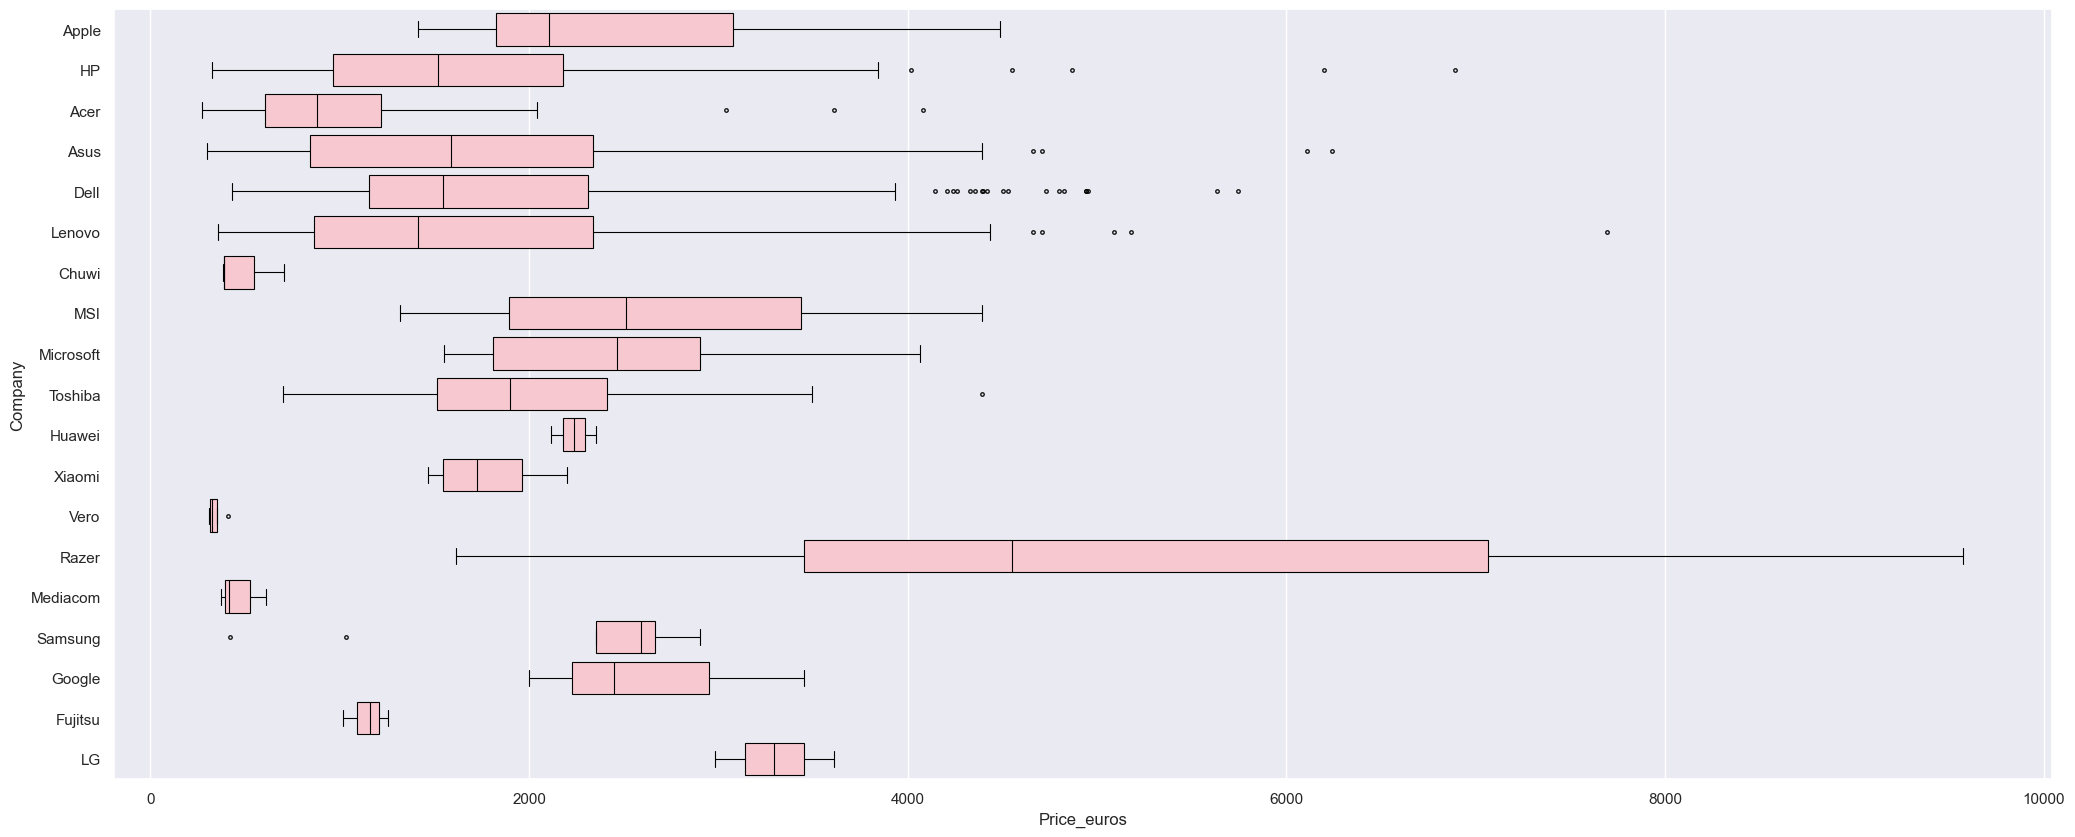

In [23]:
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

def plot_box(x, y, subtitle, color, order=None):
    plt.figure(figsize=(25, 10)) 
    ax = sb.boxplot(data = laptop_data_clean, y = y, x = x, order = order,
                 linewidth = 0.8, color = color, **PROPS,
                 flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 2.5, linestyle = 'none',  alpha = 0.9))


plot_box(x = "Price_euros", y = "Company",
         subtitle = "Distributions, boxplots", color = "pink")